In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import queue
import random
import time

Creamos el tablero en donde en la primera Fila "Fila = 0", se llenara toda la columna de 1 "tablero[0,0::1] = 1". Y de manera aletoria en la misma fila creamos al jugador con un valor de 3. Pero su posicion en la columna es aleotoria. "tablero[0,aletorio] = 3.
Para el segundo jugador estara posicionado en la ultima fila "Fila - 1" En donde  en esa fila se llenara toda las columnas de 2. "tablero[fila - 1, 0::1] = 2". Y justo en la misma fila creamos al segundo jugador con un valor de 4, y su posicion en columna es aleatoria. "tablero[fila - 1, aletorio] = 4". Y los que respecta al centro de la tabla lo llenas con bloques con los valores de 5.

In [ ]:
def Generar_Tablero(n):
    tablero = np.zeros(shape=(n,n)).astype(int)
    ## Ganar
    tablero[0,0::1] = 1
    tablero[n - 1,0::1] = 2
    ## Jugadores
    pos1 = random.randint(0,n - 1)
    pos2 = random.randint(0,n - 1)
    tablero[0, pos1] = 3
    tablero[n - 1, pos2] = 4
    #OBSTACULOS
    i = 1
    j = n - 1
    for i in range(1, j):
      tablero[i, random.randint(0,n - 1)] = 5
    return tablero

In [ ]:
def dibujarTablero(matriz, id=True):
  plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=False, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True);
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=id, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True,
  mask=np.array(matriz)<0);
  plt.show()

Esta funcion recibe la matriz que se genero como tambien un string de los movimientos, y buscamos al primer jugador que se en cuentra en la primera fila. Para buscarlo hacemos un recorrido columna por columna en la primera fila "Fila = 0". Donde el primer jugador tiene su valor de 3. Una ves encontrado el jugador creamos una variable "start" en donde se almacena la poscion en donde se le encontro al jugador.

Luego hacemos un for donde recorera el string que recibe la funcion en este caso es "path". Donde path va recibir las instrucciones donde se va a mover el jugador ya sea izquierda "L", derecha "R", abajo "D", arriba "U". Y cada moviendo es respecto al "start" donde era la posicion original del jugador y ahora se va moviendo segun los parametros que recibe.

Por ultimo en la funcion creamos un doble "for".
El primer for recibe como parametro la posicion orginal del jugador, tambien creamos otra variable que recorrera las fila. Y todo el primer for recorre la matriz. El segundo "for" es casi similar solo que los parametros recorre las columas. Y dentro del doble "for" decimos que cada vez que avance de una rastro y ese rastro es el valor del jugador.

matriz[j, i] = 3


In [ ]:

def Pinta_Camino(matriz, path = ""):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 3
        print()

In [ ]:
def valid(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False
        elif (matriz[j][i] == 4):
            return False
    return True

In [ ]:
def findEnd(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
          start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 2:
        print("Found: " + moves)
        Pinta_Camino(matriz, moves)
        return True

    return False

In [ ]:

def Pinta_Camino_jugador_segundo(matriz,n, path = ""):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
            start = x

    i = start
    j = n - 1
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 4
        print()

In [ ]:
def valid_jugador_segundo(matriz,n, moves):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
            start = x

    i = start
    j = n - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False
        elif (matriz[j][i] == 3):
            return False    

    return True

In [ ]:
def findEnd_segundo_jugador(matriz,n, moves):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
          start = x
    i = start
    j = n - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 1:
        print("Found: " + moves)
        Pinta_Camino_jugador_segundo(matriz,n, moves)
        return True

    return False

In [ ]:
def findEnd_segundo_jugador(matriz,n, moves):
    for x, pos in enumerate(matriz[n-1]):
        if pos == 4:
          start = x
    i = start
    j = n - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 1:
        print("Found: " + moves)
        Pinta_Camino_jugador_segundo(matriz,n, moves)
        return True

    return False

In [ ]:
def mesure_time(main,n):
  start=time.time()
  main(n)
  end=time.time()
  return end-start

In [ ]:
def main(n):
  matriz = Generar_Tablero(n)

  #-----------Primer Peon
  nums = queue.Queue()
  nums.put("")
  add = ""

  while not findEnd(matriz, add): 
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(matriz, put):
              nums.put(put)

  #----------Segundo Peon

  nums = queue.Queue()
  nums.put("")
  agregar = ""

  while not findEnd_segundo_jugador(matriz,n, agregar): 
      agregar = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = agregar + j
          if valid_jugador_segundo(matriz,n, put):
              nums.put(put)

  dibujarTablero(matriz)

Found: LDDDDDDDD









Found: RUUUUUUUU











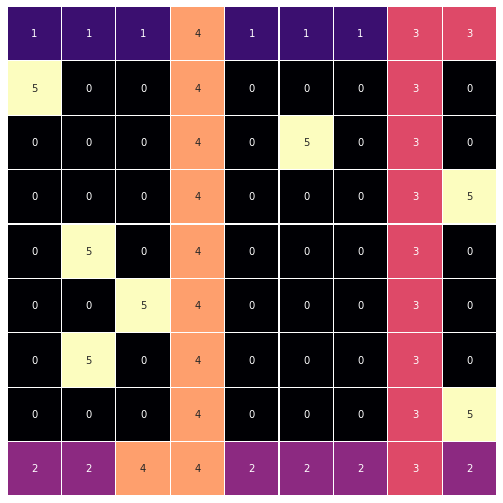

El tiempo es  5.734004974365234


In [ ]:
print("El tiempo es ",mesure_time(main,9))